# Intro to Python and Data
In this overview we are going to walk through some basic principles of programming in python as well as exporing data.

### Goals
We will be working with data about video games and exploring the data to find some interesting patterns as well as explore the abilities of Jupyter Notebooks.

# Import Dependancies

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML

# Loading Data
Data grabbed from, https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games


## Pandas Dataframes
Objects representing tables with columns

![](https://cdn-images-1.medium.com/max/1600/1*JjZYjvyBurwgQa1RBRtzAA.png)

In [2]:
data = pd.read_csv("data/appstore_games.csv")

In [3]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
data.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


# Widgets

In [5]:
wgt_column_sort = widgets.Dropdown(
    options=list(data.columns),
    value=list(data.columns)[0],
    description='Sort Column',
    disabled=False,
)

wgt_select_acs = widgets.Dropdown(
    options=(True, False),
    value=False,
    description='Ascending',
    disabled=False,
)
wgt_slider_count = widgets.IntSlider(
    value=10,
    base=10,
    min=1, # max exponent of base
    max=20, # min exponent of base
    step=1, # exponent step
    description='View Count'
)

box_layout = widgets.Layout(
    display='flex',
    border='solid',
    padding='12px'
)

ui = widgets.HBox([wgt_column_sort, wgt_select_acs, wgt_slider_count], layout=box_layout)


# define action function
def filter_table(by, asc, count):
    display(HTML(
        data.sort_values(by=[by], ascending=asc).head(count).to_html()
    ))

# setup interactive widgets
out = widgets.interactive_output(
    filter_table, 
    {
        'by':wgt_column_sort, 
        'asc':wgt_select_acs, 
        'count':wgt_slider_count
    }
)

# show widgets
display(ui, out)

Output()

In [6]:
wgt_column_sort_groupby = widgets.Dropdown(
    options=list(data.columns),
    value='Primary Genre',
    description='Sort Column',
    disabled=False,
)
wgt_slider_count_groupby = widgets.IntSlider(
    value=10,
    base=10,
    min=1, # max exponent of base
    max=20, # min exponent of base
    step=1, # exponent step
    description='View Count'
)

ui_2 = widgets.HBox([wgt_column_sort_groupby, wgt_slider_count_groupby], layout=box_layout)

def groupby_col(column, row_count):
    display(HTML(
        data.groupby(column).count().head(row_count).to_html()
    ))
    
# setup interactive widgets
out_2 = widgets.interactive_output(
    groupby_col, 
    {
        'column':wgt_column_sort_groupby,
        'row_count': wgt_slider_count_groupby
    }
)

# show widgets
display(ui_2, out_2)

Output()

# Simple Machine Learning
for more information, https://www.kaggle.com/ronitf/heart-disease-uci/

In [7]:
df_heart = pd.read_csv("data/heart.csv")

In [8]:
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf2b06f518>,
      dtype=object)

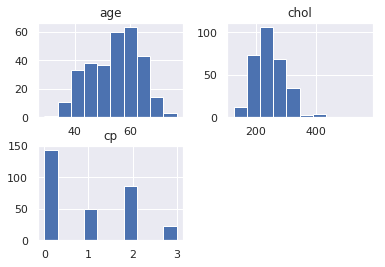

In [9]:
df_heart.hist(['chol','age', 'cp'])

In [10]:
wgt_col_select_x = widgets.Dropdown(
    options=list(df_heart.columns),
    value=df_heart.columns[0],
    description='Column X',
    disabled=False,
)
wgt_col_select_y = widgets.Dropdown(
    options=list(df_heart.columns),
    value=df_heart.columns[1],
    description='Column Y',
    disabled=False,
)


ui_3 = widgets.HBox([wgt_col_select_x, wgt_col_select_y], layout=box_layout)

def show_lmplot(x, y):
    ax = sns.lmplot(x=x, y=y, data=df_heart)
    
# setup interactive widgets
out_3 = widgets.interactive_output(
    show_lmplot, 
    {
        'x': wgt_col_select_x,
        'y': wgt_col_select_y
    }
)

# show widgets
display(ui_3, out_3)

Output()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

"""
NOTE: If using conda, install graphviz with, 'conda install graphviz'
"""
import pydotplus

In [12]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
def train(features):
    model = DecisionTreeClassifier()

    # get columns
    y, x = df_heart['target'], df_heart[features]

    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    # y_train
    clf = model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_predicted), clf)

In [14]:
features = ['sex', 'age', 'chol', 'thalach', 'ca',]
# for i in range(1,8):
results = train(features)
print(f"Accuracy: {results[0]}")

Accuracy: 0.6578947368421053


In [15]:
results[1].feature_importances_

array([0.07914045, 0.21386558, 0.17023141, 0.27577795, 0.26098461])

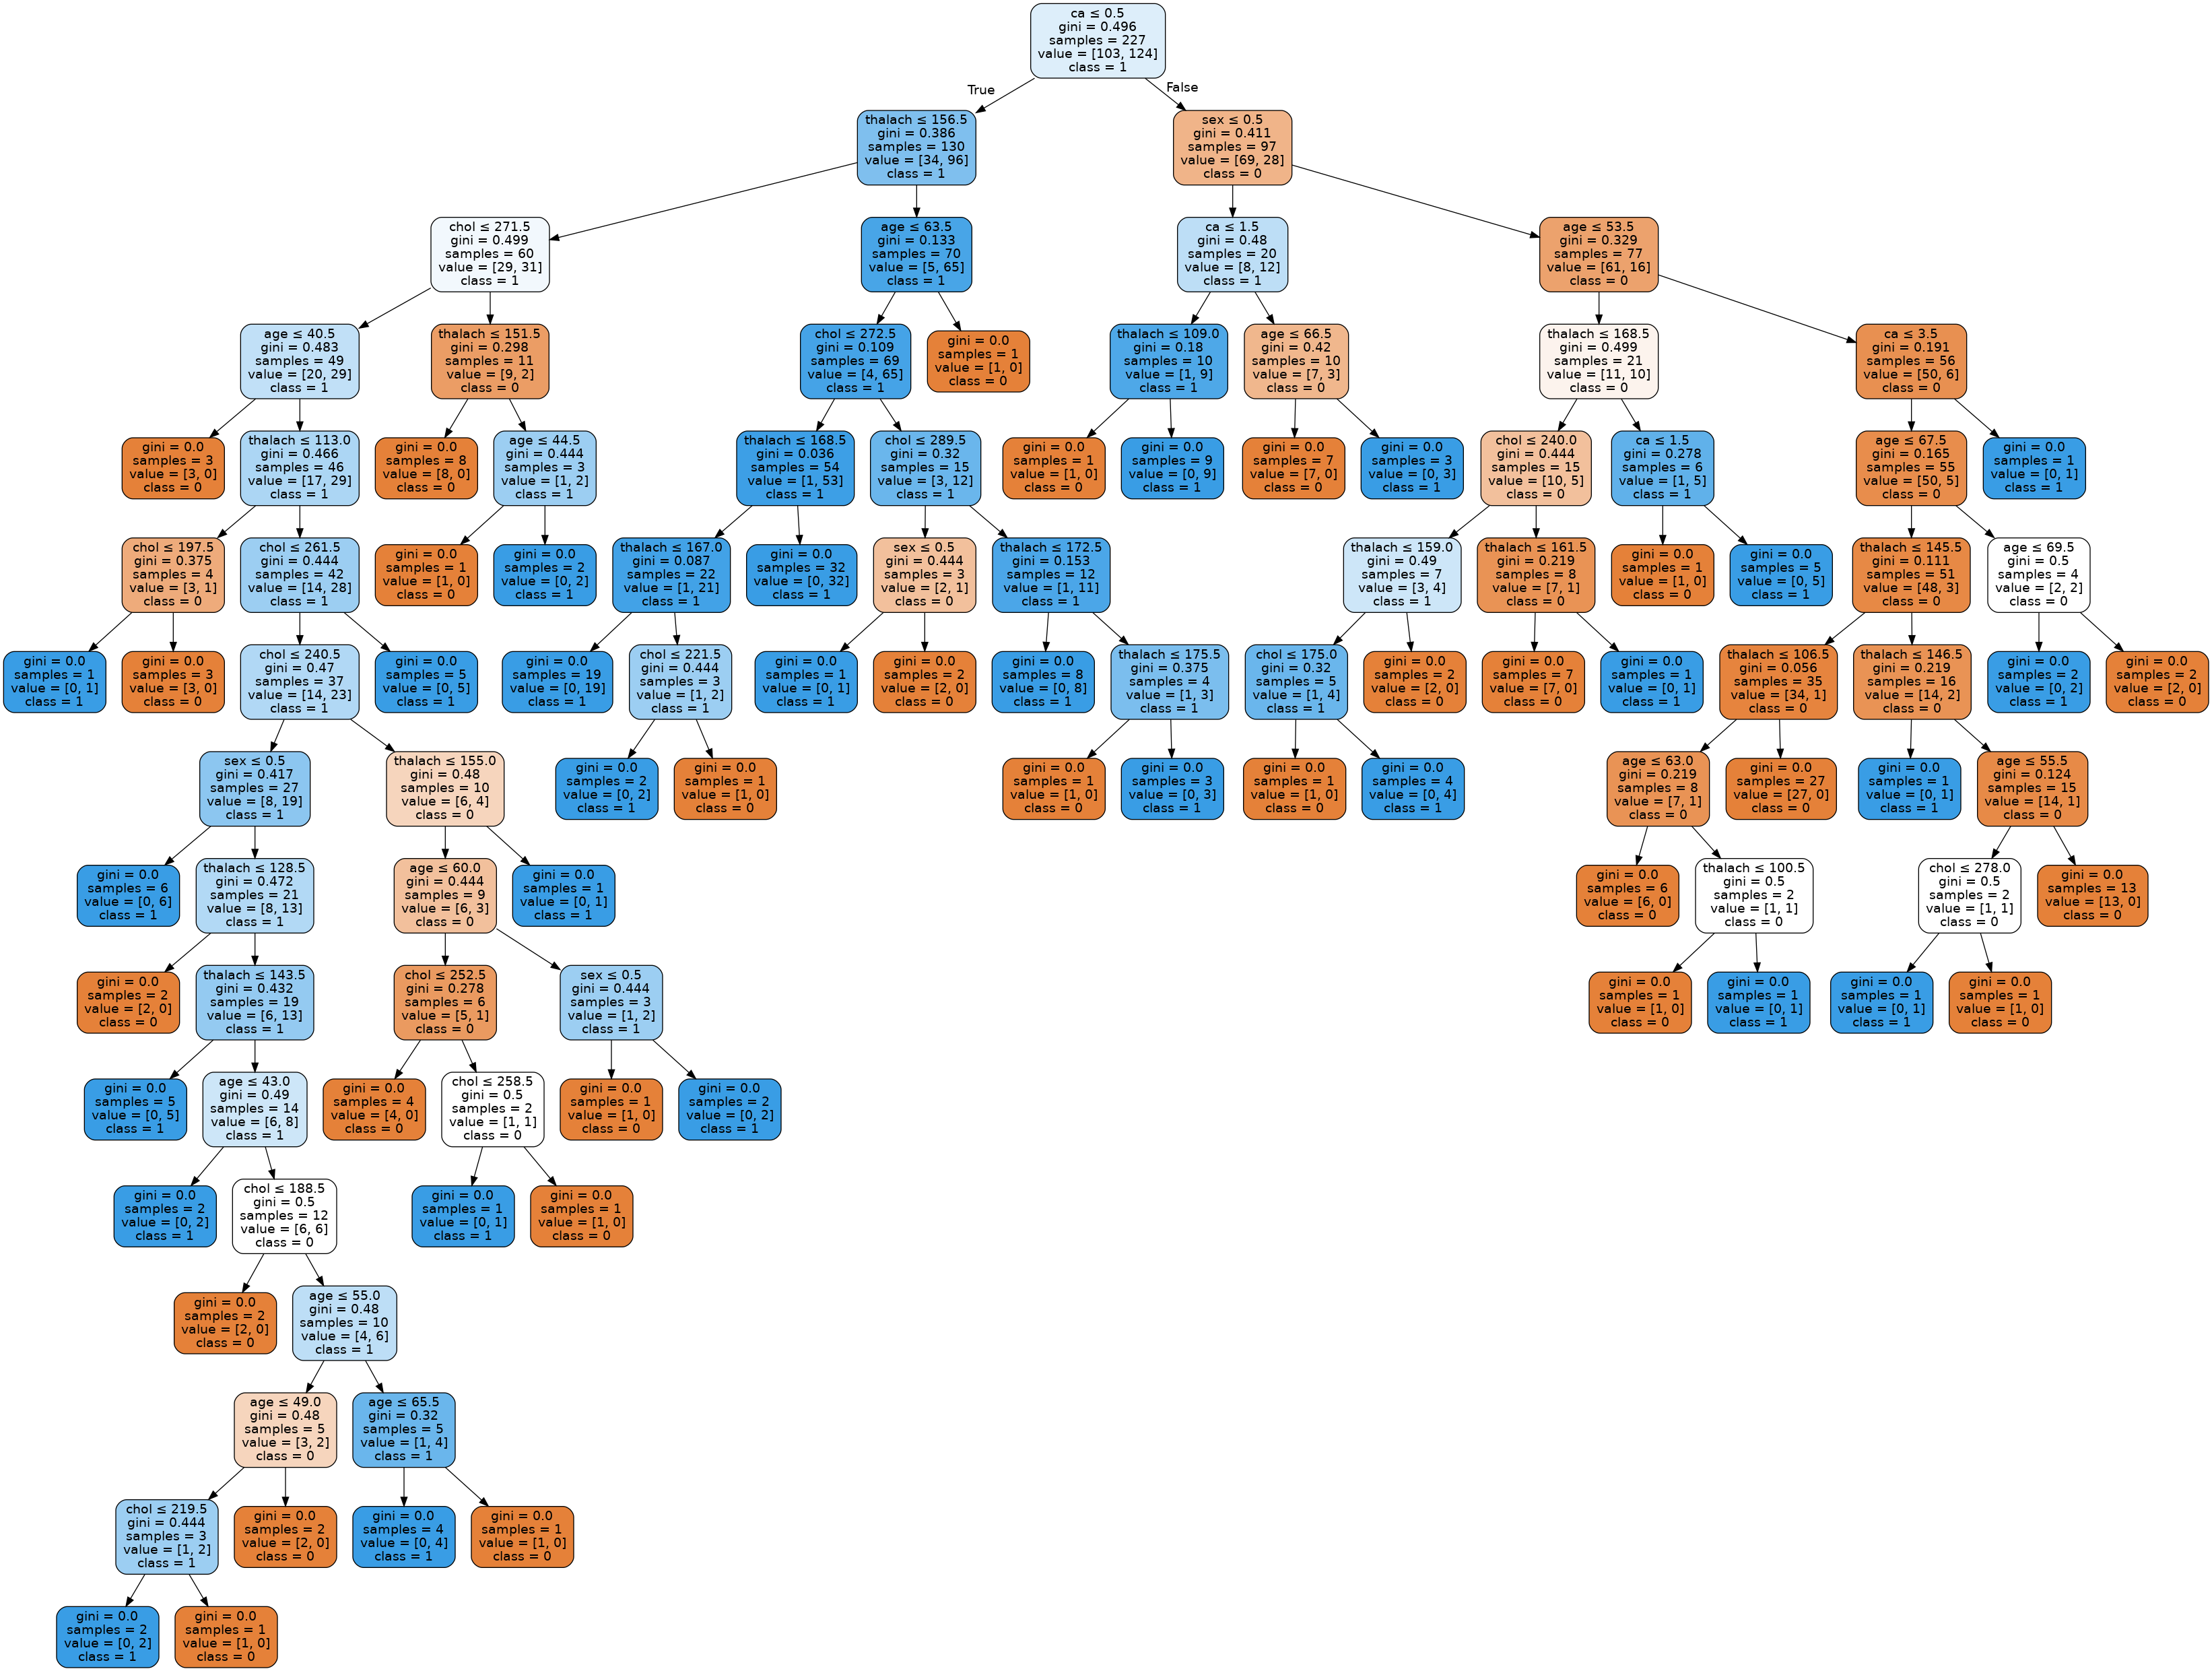

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(results[1], 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=features, 
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_disease.png')
Image(graph.create_png())